In [1]:
import numpy as np
from pfe.mesh import Mesh
from pfe.constant import Constant
from pfe.interpolation import Lagrange2
from pfe import Model
from pfe.models.lpe_2d import LPE, Impedance, Wall, Velocity

mesh = Mesh('duct.msh')

model = Model()

model.parameters['omega'] = Constant(2*np.pi*2)
model.parameters['rho0'] = Constant(1.0)
model.parameters['c0'] = Constant(1.0)
model.parameters['u0'] = Constant(0.0)  #Lagrange2(mesh, lambda x: x[0]*10)
model.parameters['v0'] = Constant(0.0) #Lagrange2(mesh, lambda x: x[1]*20)

model.fields['phi'] = Lagrange2(mesh)

Z = Constant(1.0)
V = Constant(1.0)
model.terms.append(LPE(mesh.group(0)))
model.terms.append(Velocity(mesh.group(4), V))
model.terms.append(Wall(mesh.group([1, 3])))
model.terms.append(Impedance(mesh.group(2), Z))

model.declare_fields()
model.build()
model.solve()

Opening mesh duct.msh
Reading 46957 nodes
Reading elements...
* 500 elements Line 3
* 23228 elements Triangle 6
Reading groups...
* group 0: 23228 elements
* group 1: 200 elements
* group 2: 50 elements
* group 3: 200 elements
* group 4: 50 elements

Allocating fields...
* Field phi: 46957 DOFs
Total: 46957 DOFs

Building model...
* Group LPE
* Group Velocity
* Group Wall
* Group Impedance
Time: 3.0279s
Global system: 46957 DOFs, 536245 non-zero entries

Solving model...
Time: 1.3809s


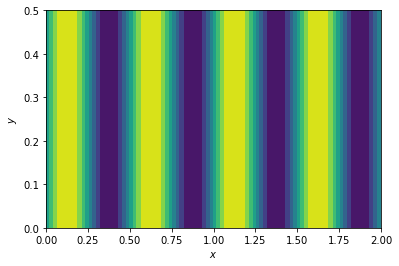

In [2]:
import matplotlib.pyplot as plt

model.fields['phi'].plot(model.solution)
plt.xlabel("$x$")
plt.ylabel("$y$");